In [16]:
import pickle
with open('language_activities.pkl', 'rb') as x:
    language_editors = pickle.load(x)

print("El diccionario language_activities ha sido cargado correctamente.")

El diccionario language_activities ha sido cargado correctamente.


In [17]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Diccionario de números para cada categoría
category_dict = {
    'art': 1,
    'events': 2,
    'games': 3,
    'geography': 4,
    'health': 5,
    'history': 6,
    'mathematics': 7,
    'nature': 8,
    'philosophy': 9,
    'politics': 10,
    'religion': 11,
    'rights': 12,
    'sports': 13
}


data_list = []
for language, categories_data in language_editors.items():
    for category, activity in categories_data.items():
        category_number = category_dict[category]
        for (day_of_week, hour), edits in activity.items():
            # Crear una columna que represente la hora de la semana
            week_hour = day_of_week * 24 + hour
            data_list.append([language, category_number, week_hour, edits])

data = pd.DataFrame(data_list, columns=['language', 'category', 'week_hour', 'editors'])

# Pivotar el DataFrame para que cada hora de la semana sea una columna y cada fila sea una combinación de idioma y categoría
data_pivot = data.pivot_table(index=['language'], columns=['week_hour', 'category'], values='editors', fill_value=0)

# Normalizar los datos utilizando z-score

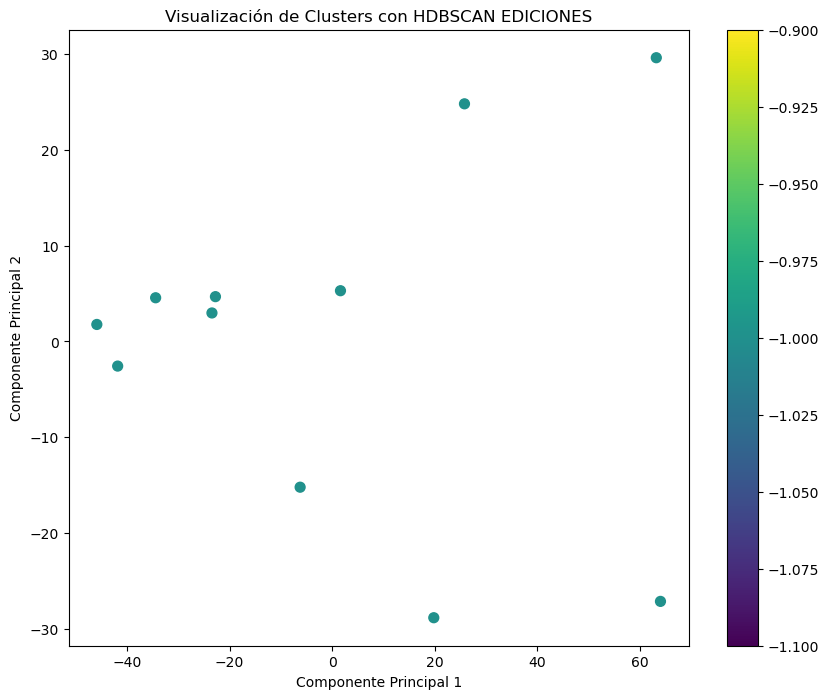

           0         1         2         3         4         5         6  \
0  -0.962364 -0.710354 -0.862345 -0.927328 -0.472685 -0.938948 -0.275940   
1   2.113293 -0.447272 -0.552812  0.434966 -0.795867  0.568441 -0.188274   
2   0.938400  1.576888  0.725159  0.563675  0.661377  1.567258  1.560715   
3   0.706301  1.451557  0.521051  2.021103  2.465374  1.569549  1.788995   
4  -1.236109 -0.944877 -1.440956 -1.267078 -1.025084 -1.083192 -1.484174   
5  -0.187372  0.411913  1.232056 -0.178607  0.422669 -0.649816 -0.650041   
6   0.294160 -0.787997  1.840088  0.743209  0.776698  0.652520  0.546909   
7   0.635414  1.566194  0.429111  1.040950  0.225881  0.772007 -0.249033   
8  -0.541917 -0.501668  0.070543 -0.497889 -0.723416 -0.457826 -0.499880   
9  -1.287890 -0.879986 -1.153489 -1.248297 -0.913402 -1.155776 -1.240271   
10 -0.471916 -0.734398 -0.808406 -0.684705 -0.621542 -0.844218  0.690994   

           7         8         9  ...      2175      2176      2177      2178  \
0  -0.

In [18]:
import hdbscan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Supongamos que tus datos están en un archivo CSV
# data = pd.read_csv('ruta_a_tus_datos.csv')
# Estandarizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pivot)


# Probar diferentes parámetros
min_cluster_size = 3  # Puedes experimentar con diferentes valores
min_samples = 1    # Puedes definir un valor o dejarlo como None

# Inicializar el modelo HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)


# Ajustar el modelo a los datos
cluster_labels = clusterer.fit_predict(data_scaled)

# Crear un DataFrame con los resultados
result_df = pd.DataFrame(data_scaled)
result_df['Cluster'] = cluster_labels

# Reducir la dimensionalidad para visualización
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)

# Crear una gráfica de los clusters
plt.figure(figsize=(10, 8))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.colorbar()
plt.title("Visualización de Clusters con HDBSCAN EDICIONES")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()



print(result_df)

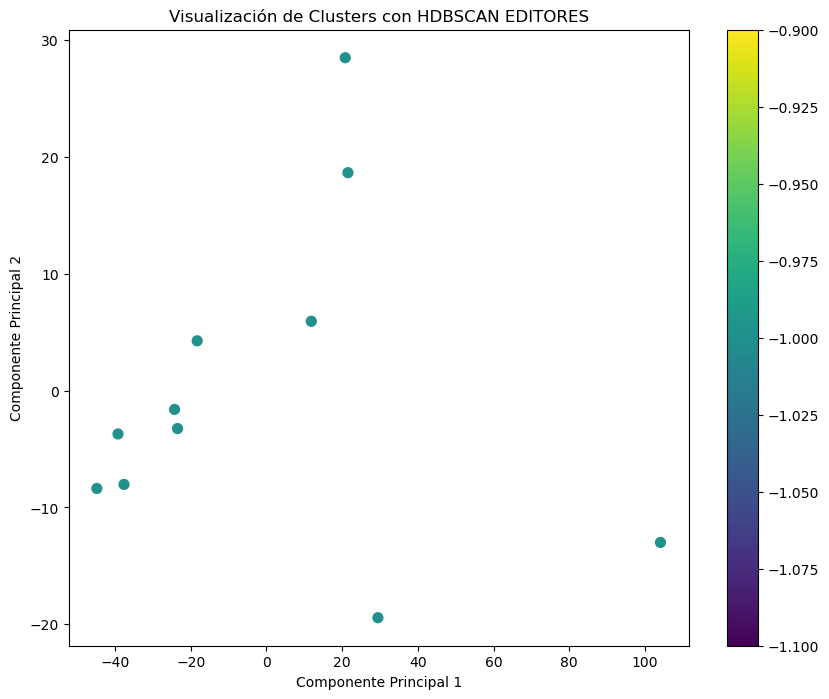

           0         1         2         3         4         5         6  \
0  -0.915519 -0.698209 -0.926866 -0.962683 -0.737853 -0.792830 -0.715268   
1   1.217262 -0.155869 -0.230435  0.526049 -0.562979  0.230722  0.037503   
2   2.084170  2.309742  1.355172  2.156398  2.143585  2.554293  2.414901   
3  -0.019926  0.298672  0.051410  0.695602  1.040027  0.171353  0.815793   
4  -0.998947 -0.810088 -1.277809 -1.105852 -1.055804 -0.832303 -1.242634   
5  -0.549399 -0.222345  0.087777 -0.481571 -0.269536 -0.629165 -0.647221   
6   0.230577 -0.545190  1.940682  0.895031  0.871778  0.279180  0.751998   
7   1.121133  1.688635  0.995137  0.613735  0.843957  1.064615  0.001353   
8  -0.583997 -0.472443 -0.123152 -0.573525 -0.679562 -0.515882 -0.466471   
9  -1.046026 -0.787010 -1.141432 -1.152412 -0.984928 -0.883167 -1.104413   
10 -0.539327 -0.605896 -0.730483 -0.610773 -0.608685 -0.646815  0.154459   

           7         8         9  ...      2175      2176      2177      2178  \
0  -0.

In [15]:
import hdbscan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Supongamos que tus datos están en un archivo CSV
# data = pd.read_csv('ruta_a_tus_datos.csv')
# Estandarizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pivot)


# Probar diferentes parámetros
min_cluster_size = 2  # Puedes experimentar con diferentes valores
min_samples = None    # Puedes definir un valor o dejarlo como None

# Inicializar el modelo HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)


# Ajustar el modelo a los datos
cluster_labels = clusterer.fit_predict(data_scaled)

# Crear un DataFrame con los resultados
result_df = pd.DataFrame(data_scaled)
result_df['Cluster'] = cluster_labels

# Reducir la dimensionalidad para visualización
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)

# Crear una gráfica de los clusters
plt.figure(figsize=(10, 8))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.colorbar()
plt.title("Visualización de Clusters con HDBSCAN EDITORES")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()



print(result_df)

In [1]:
pip install hdbscan

  Obtaining dependency information for hdbscan from https://files.pythonhosted.org/packages/92/84/5ed86936a26efe0baf8d26e8c4d624eb10275bf77ff5382591748e6f637c/hdbscan-0.8.36-cp311-cp311-macosx_10_9_universal2.whl.metadata
  Obtaining dependency information for cython<3,>=0.27 from https://files.pythonhosted.org/packages/7e/26/9d8de10005fedb1eceabe713348d43bae1dbab1786042ca0751a2e2b0f8c/Cython-0.29.37-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.5/989.5 kB 25.8 MB/s eta 0:00:0000:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [105]:
import pandas as pd
import os

# Directory containing the CSV files
directory = 'category_edits'

# Translation dictionary
translation_dict = {
    'arte': 'art', 'deporte': 'sports', 'derecho': 'rights', 'eventos': 'events',
    'filosofia': 'philosophy', 'geografia': 'geography', 'historia': 'history',
    'juegos': 'games', 'matematica': 'mathematics', 'naturaleza': 'nature',
    'politica': 'politics', 'salud': 'health', 'desportos': 'sports', 
    'direito': 'rights', 'jogos': 'games', 'natureza': 'nature', 
    'religiao': 'religion', 'saude': 'health'
}

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each CSV file in the directory
for file in os.listdir(directory):
    if file.startswith('category_counts_') and file.endswith('.csv'):
        # Determine the language from the filename
        language = file.split('_')[2].split('.')[0]

        # Load the CSV file
        path = os.path.join(directory, file)
        df = pd.read_csv(path)

        # Translate categories using the dictionary
        df['categories'] = df['categories'].map(translation_dict).fillna(df['categories'])

        # Add a column for the language
        df['language'] = language

        # Append to the list of DataFrames
        dfs.append(df)

# Concatenate all DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Create a pivot table
pivot_table = combined_df.pivot_table(index='language', columns='categories', values='counts', fill_value=0)

# Display the pivot table
print(pivot_table)
data=pivot_table


categories       art   events   foods   games  geography   health   history  \
language                                                                      
ar            903925   543873   37586  143757     864884   495375    969461   
de          10415921  1360659       0  265599    4209418   327145   7526262   
es           6130683  5804623       0  525643    3996127  1700446  10590511   
fr           6240798  6103791       0  505773    7712377  4064701  11844271   
hu            950572   267652       0   38149    1169371   114506   1642787   
it           3299500  3335852       0  685083    2765888  1516779   2332502   
ja           3578264   344568  172023  648159    3316937  1385840   5574262   
pt           4343667  4757340       0  348168    4157907  1120283   6254149   
ru           1892793   953538   93896  351049    1631271   312386   2492216   
vi            263335   342997    9396   91053     514706   202285    474486   
zh           2279824   572207   75876  159273    139

In [106]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'pivot_table' is already created and loaded. If not, load it from a CSV or recreate it.

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(pivot_table)

In [63]:
pivot_table

categories,art,events,foods,games,geography,health,history,mathematics,nature,philosophy,politics,religion,rights,sports
language,,,,,,,,,,,,,,
ar,903925,543873,37586,143757,864884,495375,969461,192630,1021854,594310,950710,532208,225583,236376
de,10415921,1360659,0,265599,4209418,327145,7526262,294100,2392186,474036,5669907,2420433,1746926,2587091
es,6130683,5804623,0,525643,3996127,1700446,10590511,550932,3905654,6976327,4889978,1779186,6158384,2257600
fr,6240798,6103791,0,505773,7712377,4064701,11844271,688477,2908676,2366973,8164094,1995503,3102932,2627204
hu,950572,267652,0,38149,1169371,114506,1642787,65579,778220,146737,637001,229554,249616,376595
it,3299500,3335852,0,685083,2765888,1516779,2332502,178707,1369295,873080,1661900,1362634,1321674,1497913
ja,3578264,344568,172023,648159,3316937,1385840,5574262,288014,3583637,1128588,2445083,640017,547433,1103669
pt,4343667,4757340,0,348168,4157907,1120283,6254149,232137,5297173,3568693,4095606,1434052,544189,1699968
ru,1892793,953538,93896,351049,1631271,312386,2492216,172067,3012209,435277,1156190,748237,531110,511254


{-1: 11}


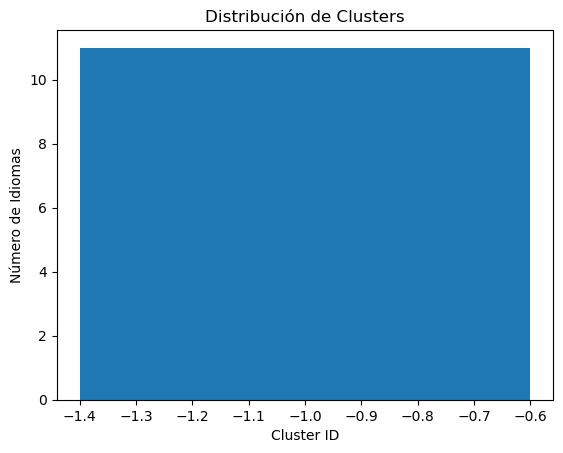

categories  Cluster       art   events   foods   games  geography   health  \
language                                                                     
ar               -1    903925   543873   37586  143757     864884   495375   
de               -1  10415921  1360659       0  265599    4209418   327145   
es               -1   6130683  5804623       0  525643    3996127  1700446   
fr               -1   6240798  6103791       0  505773    7712377  4064701   
hu               -1    950572   267652       0   38149    1169371   114506   
it               -1   3299500  3335852       0  685083    2765888  1516779   
ja               -1   3578264   344568  172023  648159    3316937  1385840   
pt               -1   4343667  4757340       0  348168    4157907  1120283   
ru               -1   1892793   953538   93896  351049    1631271   312386   
vi               -1    263335   342997    9396   91053     514706   202285   
zh               -1   2279824   572207   75876  159273    139554

In [23]:
from sklearn.preprocessing import StandardScaler
from hdbscan import HDBSCAN
import matplotlib.pyplot as plt

# Asumiendo que 'data' es tu DataFrame con la primera columna como 'language'

# Estandarización de los datos (omitimos la primera columna 'language')
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, 1:])

# Aplicar HDBSCAN con parámetros ajustados
clusterer = HDBSCAN(min_samples=2, min_cluster_size=2)  # Ajusta estos valores según necesidad
cluster_labels = clusterer.fit_predict(data_scaled)

# Revisar los resultados
unique, counts = np.unique(cluster_labels, return_counts=True)
print(dict(zip(unique, counts)))  # Imprimir la distribución de clusters

# Agregar las etiquetas del cluster al DataFrame
data['Cluster'] = cluster_labels

# Visualización de la distribución de clusters
plt.bar(unique, counts)
plt.title('Distribución de Clusters')
plt.xlabel('Cluster ID')
plt.ylabel('Número de Idiomas')
plt.show()

# Muestra las etiquetas de cluster añadidas al DataFrame
print(data[['Cluster'] + list(data.columns[:-1])])

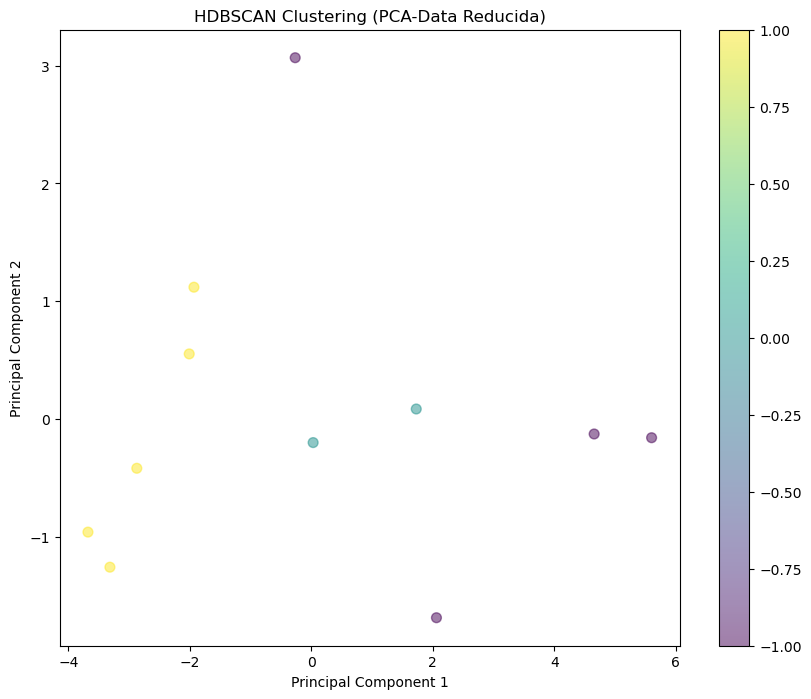

In [99]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import hdbscan
import matplotlib.pyplot as plt

# Asumiendo que 'data' es tu DataFrame con los datos originales.

# Estandarizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Aplicar PCA
pca = PCA(n_components=2)  
data_pca = pca.fit_transform(data_scaled)

# Convertir la salida del PCA a DataFrame para un manejo más fácil
data_pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])

# Aplicar HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, gen_min_span_tree=True)
cluster_labels = clusterer.fit_predict(data_pca_df)

# Visualizar los resultados de HDBSCAN
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data_pca_df['PC1'], data_pca_df['PC2'], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.colorbar(scatter)
plt.title('HDBSCAN Clustering (PCA-Data Reducida)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



In [114]:
clusterer.labels_

array([ 1, -1, -1, -1,  1,  0, -1,  0,  1,  1,  1])

In [116]:
pd.crosstab(clusterer.labels_,columns='count')

col_0,count
row_0,
-1,4
0,2
1,5


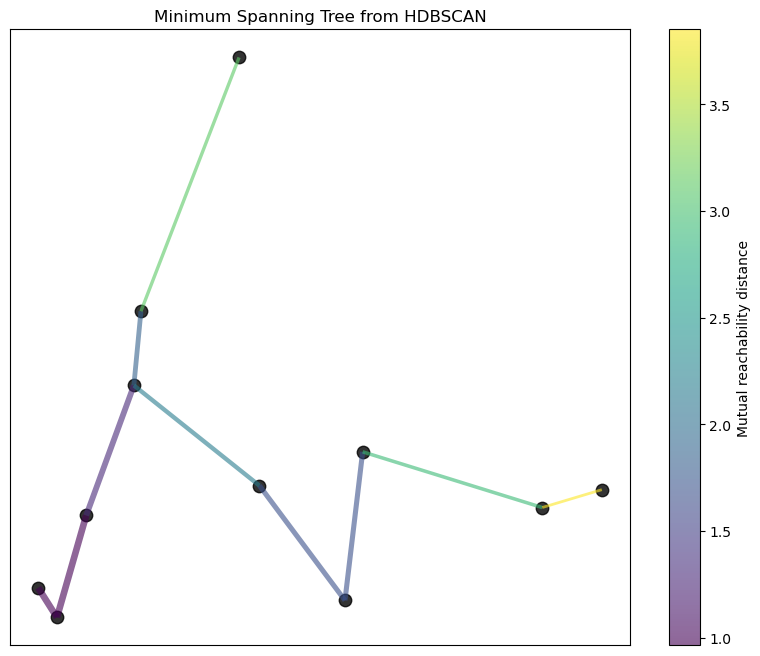

In [56]:
# Opcional: Dibujar el árbol de expansión mínimo si es necesario
fig, ax = plt.subplots(figsize=(10, 8))
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', 
                                      edge_alpha=0.6, 
                                      node_size=80, 
                                      edge_linewidth=2)
plt.title('Minimum Spanning Tree from HDBSCAN')
plt.show()

<Axes: ylabel='distance'>

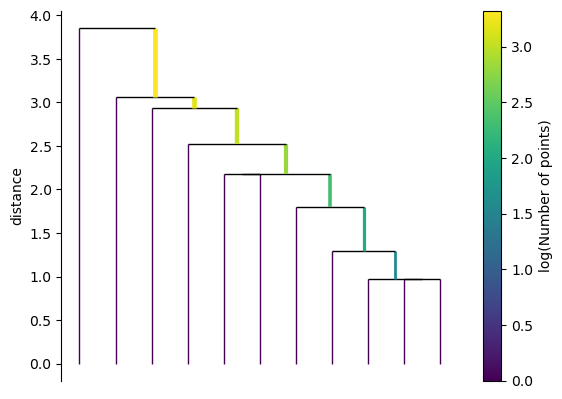

In [96]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

<Axes: ylabel='$\\lambda$ value'>

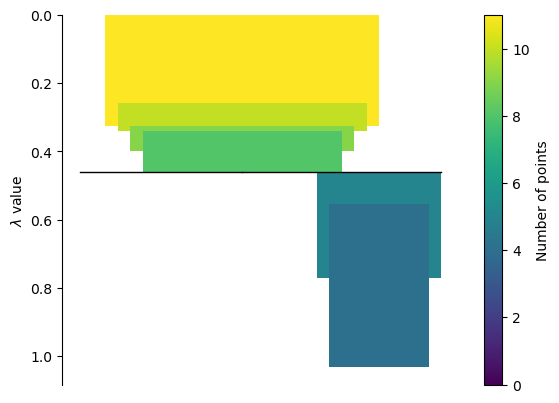

In [103]:
clusterer.condensed_tree_.plot()

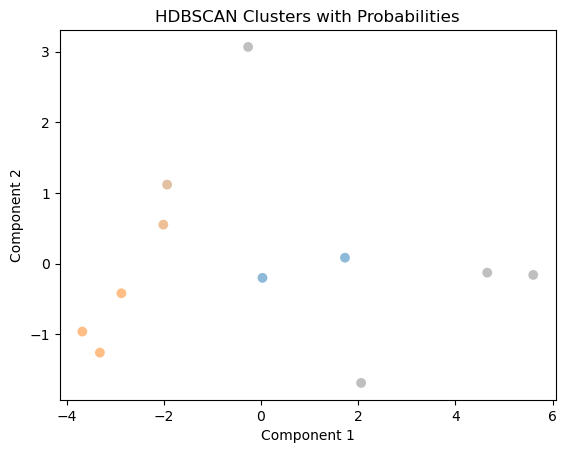

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que `data_pca_df` es tu DataFrame con los componentes principales
# y que `clusterer` es tu modelo HDBSCAN ya ajustado.

# Crear la paleta de colores
palette = sns.color_palette()
# Ajustar los colores basándote en las etiquetas de cluster y probabilidades
cluster_colors = [sns.desaturate(palette[col % len(palette)], sat)
                  if col >= 0 else (0.5, 0.5, 0.5)  # Color gris para outliers
                  for col, sat in zip(clusterer.labels_, clusterer.probabilities_)]

# Opciones de plot adicionales
plot_kwds = {'alpha' : 0.5, 's' : 50, 'linewidths':0}

# Realizar el scatter plot
plt.scatter(data_pca_df['PC1'], data_pca_df['PC2'], c=cluster_colors, **plot_kwds)
plt.title('HDBSCAN Clusters with Probabilities')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [66]:
data=pivot_table

In [75]:
data_scaled

array([[-9.62040619e-01, -7.52810405e-01,  4.16278526e-02,
        -9.24250307e-01, -1.00382148e+00, -5.11989100e-01,
        -9.68790522e-01, -5.22504667e-01, -1.03482562e+00,
        -5.07789977e-01, -8.22155934e-01, -7.08877874e-01,
        -6.48472197e-01, -1.06953739e+00],
       [ 2.35393767e+00, -3.85305931e-01, -6.56044090e-01,
        -3.56120837e-01,  6.58162579e-01, -6.65273625e-01,
         7.56251895e-01,  3.21470083e-02, -5.99925499e-02,
        -5.69026319e-01,  1.17253400e+00,  1.83311132e+00,
         2.25492119e-01,  1.48291398e+00],
       [ 8.60060236e-01,  1.61421004e+00, -6.56044090e-01,
         8.56422127e-01,  5.52172853e-01,  5.86023952e-01,
         1.56243154e+00,  1.43603288e+00,  1.01666526e+00,
         2.74155214e+00,  8.42876957e-01,  9.69843996e-01,
         2.75973777e+00,  1.12514634e+00],
       [ 8.98447442e-01,  1.74881761e+00, -6.56044090e-01,
         7.63771542e-01,  2.39887206e+00,  2.74023964e+00,
         1.89228587e+00,  2.18787642e+00,  3.

In [98]:
data_pca_df

,PC1,PC2
0,-2.872355,-0.419829
1,2.059267,-1.689385
2,4.654786,-0.128523
3,5.600262,-0.160232
4,-3.314922,-1.260066
5,0.029819,-0.201566
6,-0.265429,3.067831
7,1.726837,0.083752
8,-1.932196,1.118395
9,-3.676328,-0.962115


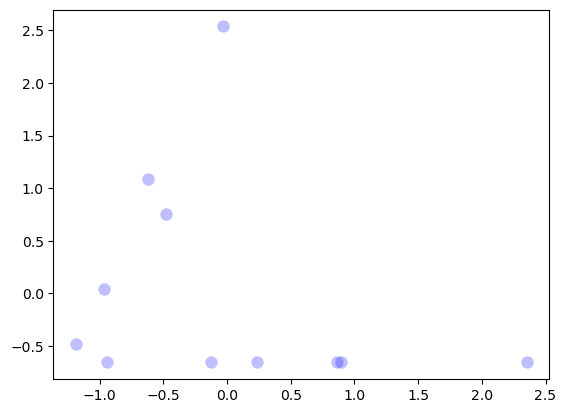

In [111]:
%matplotlib inline
plot_kws = {'alpha' : 0.25, 's' : 80, 'linewidths' : 0}
plt.scatter(data_scaled[:,0], data_scaled[:,2], c='b', **plot_kws)

In [126]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pickle

    
with open('./WEEK 27 MAY/language_activites.pkl', 'rb') as x:
    language_activities = pickle.load(x)

print("El diccionario language_activities ha sido cargado correctamente.")

# Diccionario de números para cada categoría
category_dict = {
    'art': 1,
    'events': 2,
    'foods': 3,
    'games': 4,
    'geography': 5,
    'health': 6,
    'history': 7,
    'mathematics': 8,
    'nature': 9,
    'philosophy': 10,
    'politics': 11,
    'religion': 12,
    'rights': 13,
    'sports': 14
}


data_list = []
for language, categories_data in language_activities.items():
    for category, activity in categories_data.items():
        category_number = category_dict[category]
        for (day_of_week, hour), edits in activity.items():
            # Crear una columna que represente la hora de la semana
            week_hour = day_of_week * 24 + hour
            data_list.append([language, category_number, week_hour, edits])

data = pd.DataFrame(data_list, columns=['language', 'category', 'week_hour', 'edits'])

# Pivotar el DataFrame para que cada hora de la semana sea una columna y cada fila sea una combinación de idioma y categoría
data_pivot = data.pivot_table(index=['language'], columns=['week_hour', 'category'], values='edits', fill_value=0)

# Normalizar los datos utilizando z-score
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pivot)




El diccionario language_activities ha sido cargado correctamente.


In [138]:
data_pivot#=data_pivot.drop(columns='cluster')

week_hour    0                                                                \
category      1      2     3     4      5      6      7     8      9      10   
language                                                                       
ar          7077   4235   279  1029   6757   3769   7663  1508   8048   4807   
de         62614   8196     0  1534  24528   1726  45169  1609  13344   2814   
es         41399  38672     0  3619  26207  10938  70021  3624  25609  45795   
fr         37208  36785     0  3286  45219  22342  70078  3887  16107  13763   
hu          2134    704     0    85   2325    277   4074   116   1732    390   
it         21071  21132     0  4446  16524   9429  14857  1077   8188   5264   
ja         29766   3066  1408  5438  28549  11667  47261  2456  30447   9797   
pt         22304  25085     0  1696  21492   5329  32728  1037  25587  18194   
ru         14669   7377   706  2551  12359   2184  19634  1250  22889   3419   
vi          1199   1681    71   554   2570    983   2268   397   2601   1545   
zh         15933   3873   562  1117   9922   2828  10020  2622  17472   4209   

week_hour  ...    167                                                         \
category   ...     5      6      7     8      9      10     11     12     13   
language   ...                                                                 
ar         ...   6566   3897   7421  1534   7712   4821   7139   4290   1861   
de         ...  34697   2440  61056  2247  18845   3655  45905  19674  13667   
es         ...  30602  12641  82184  4050  28871  53131  37575  12888  47443   
fr         ...  60704  31957  94049  5384  22000  18508  64306  15994  23829   
hu         ...   4415    483   6778   253   2769    692   2795    924   1029   
it         ...  21493  12112  18590  1338  10506   6677  12882  10646   9977   
ja         ...  32668  13578  54097  3092  34653  10810  23806   6324   5291   
pt         ...  25796   6498  38777  1263  31027  22018  25332   9071   3066   
ru         ...  13929   2581  21246  1346  25381   3619   9927   6595   4451   
vi         ...   3392   1253   3116   568   3434   2304   3765    591    368   
zh         ...  11091   3074  11419  2942  19395   4514  12700   3346   3125   

week_hour         
category      14  
language          
ar          1799  
de         20825  
es         20759  
fr         21352  
hu          1253  
it         12123  
ja         10813  
pt         11221  
ru          4183  
vi           430  
zh          3892  

[11 rows x 2352 columns]

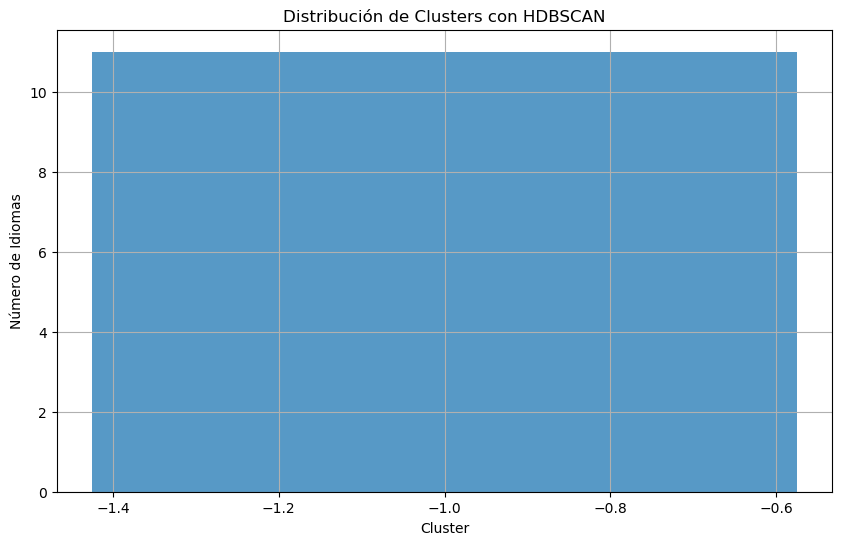

cluster
-1    11
Name: count, dtype: int64


In [140]:
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pivot)

# Inicializar el objeto HDBSCAN con parámetros ajustados
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=10,  # Aumentar para clusters más grandes y robustos
    min_samples=2,        # Reducir si los datos son ruidosos
    metric='euclidean',   # Cambiar según la naturaleza de los datos
    cluster_selection_method='eom',  # Método estándar de selección de clusters
    alpha=1.0             # Ajustar según sea necesario para controlar la persistencia
)

# Ajustar el modelo de clustering a los datos estandarizados
cluster_labels = clusterer.fit_predict(data_scaled)

# Añadir etiquetas de clustering al DataFrame original para visualización
data_pivot['cluster'] = cluster_labels

# Visualizar la distribución de los clusters
plt.figure(figsize=(10, 6))
plt.hist(cluster_labels, bins=len(set(cluster_labels)), alpha=0.75, rwidth=0.85)
plt.title('Distribución de Clusters con HDBSCAN')
plt.xlabel('Cluster')
plt.ylabel('Número de Idiomas')
plt.grid(True)
plt.show()

# Mostrar algunos datos etiquetados para verificar los resultados
print(data_pivot['cluster'].value_counts())

# Visualizar el árbol de expansión mínima
if hasattr(clusterer, 'minimum_spanning_tree_'):
    clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', edge_alpha=0.6, node_size=80, edge_linewidth=2)
    plt.title('Minimum Spanning Tree from HDBSCAN')
    plt.show()